In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d

In [124]:
data = pd.read_csv("tcav_results/seeded_steps1000_testevery10_digits0123456789/980_results.csv")
# exclude index dimension
data = data.drop(columns=["id"])
# data["t"] = 1001 - data["t"]
# data

In [125]:

results_list = []
for t in data["t"].unique():
    for i, layer in enumerate(data["layer"].unique()):
        # get data for t and layer
        data_t_layer = data[(data["t"] == t) & (data["layer"] == layer)]
        mean_accuracy = data_t_layer["accuracy"].mean().item()
        results_list.append([t, i, mean_accuracy])

data_mean_digits = pd.DataFrame(results_list, columns=["t", "layer", "accuracy"])
# data_mean_digits = data_mean_digits.sort_values(by=["t"], ascending=False)
# data_mean_digits[ data_mean_digits["t"] == 1000]



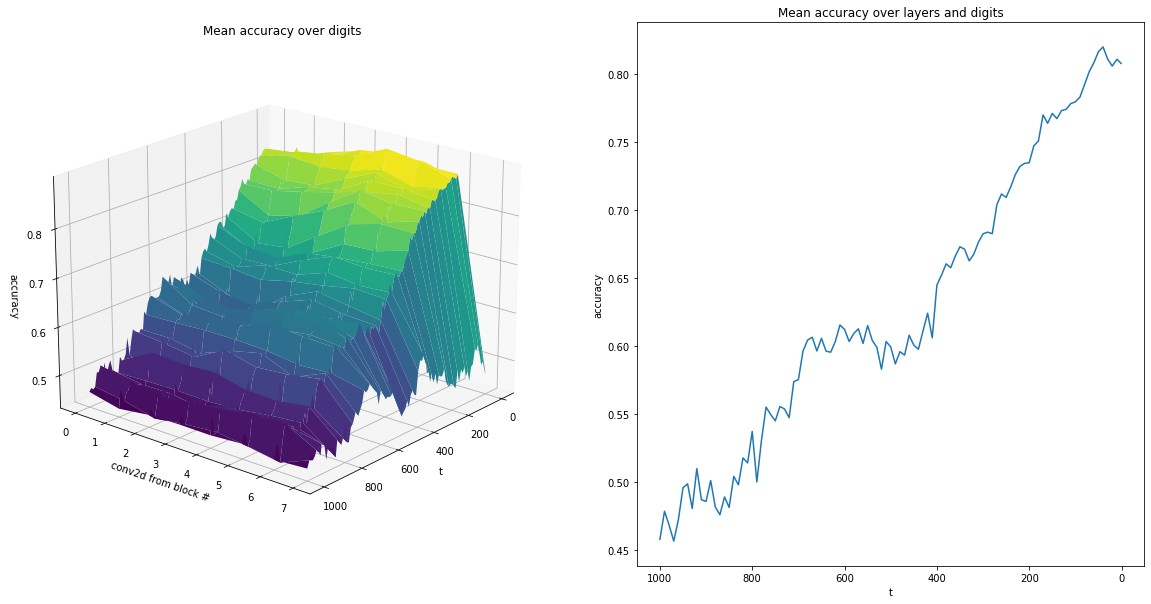

In [144]:
# 3d surface plot

fig = plt.figure( figsize=(20, 10) )
ax = fig.add_subplot(121, projection="3d")
# plt.gca().invert_yaxis()
ax.view_init(20, 40)
# axes = plt.axes(projection="3d")
# X, Y, Z = axes3d.get_test_data(0.05)
# Z.shape
Y, X = np.meshgrid(data_mean_digits["layer"].unique(), data_mean_digits["t"].unique())


Z = data_mean_digits["accuracy"].values.reshape(X.shape)
# Z = np.rot90(Z, 2)
# Z = Z*0
ax.plot_surface(X, Y, Z, cmap="viridis")
ax.set_xlabel("t")
ax.set_ylabel("conv2d from block #")
ax.set_zlabel("accuracy")
ax.set_title("Mean accuracy over digits")

mean_over_layers = data_mean_digits.drop(columns=["layer"]).groupby("t").mean()
# add subplot for arr
ax2 = fig.add_subplot(122)
ax2.set_title("Mean accuracy over layers and digits")
ax2.set_xlabel("t")
ax2.set_ylabel("accuracy")
ax2.invert_xaxis()
ax2.plot(mean_over_layers, label="mean over layers")









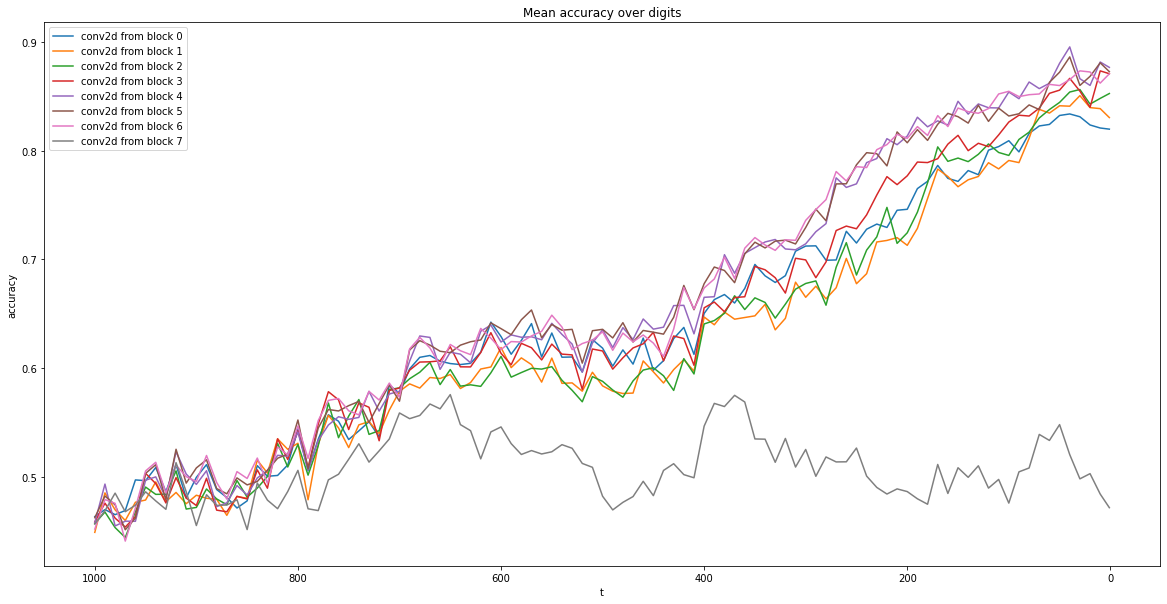

In [139]:
# For every layer, plot the accuracy over t in the same plot
fig = plt.figure( figsize=(20, 10) )
ax = fig.add_subplot(111)
ax.set_title("Mean accuracy over digits")
ax.set_xlabel("t")
ax.set_ylabel("accuracy")
ax.invert_xaxis()
for layer in data_mean_digits["layer"].unique():
    data_layer = data_mean_digits[data_mean_digits["layer"] == layer]
    ax.plot(data_layer["t"], data_layer["accuracy"], label=f"conv2d from block {layer}")
ax.legend()